# MOVIE RATINGS,PROGRESS AND MORE

##### Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

##### Data creation

In [2]:

def create_sample_movie_data():
    np.random.seed(42)
    n = 1000
    
    data = {
        'title': [f'Movie_{i}' for i in range(n)],
        'year': np.random.randint(1990, 2023, n),
        'genre': np.random.choice(['Action', 'Comedy', 'Drama', 'Horror', 'Sci-Fi', 'Romance'], n),
        'rating': np.round(np.random.normal(6.5, 1.5, n), 1),
        'budget': np.random.randint(1, 200, n) * 1000000,
        'revenue': np.random.randint(1, 500, n) * 1000000,
        'runtime': np.random.randint(80, 180, n),
        'production_company': np.random.choice(['Warner Bros', 'Disney', 'Universal', 'Paramount', 'Sony'], n),
        'votes': np.random.randint(1000, 1000000, n)
    }
    
    # Ensure revenue is generally higher than budget
    data['revenue'] = np.maximum(data['revenue'], data['budget'] * np.random.uniform(0.5, 5, n))
    
    # Create some correlation between rating and revenue
    data['rating'] = np.clip(data['rating'] + (data['revenue'] / 100000000) * 0.1, 1, 10)
    
    return pd.DataFrame(data)

# Load data
df = create_sample_movie_data()

# Basic exploration
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())

Dataset Shape: (1000, 9)

First 5 rows:
     title  year   genre    rating     budget       revenue  runtime  \
0  Movie_0  2018  Sci-Fi  4.146000  126000000  4.460000e+08      106   
1  Movie_1  2004  Horror  7.798164  123000000  4.981639e+08      133   
2  Movie_2  1997   Drama  4.945000   47000000  1.450000e+08      145   
3  Movie_3  2010   Drama  3.698416  118000000  3.984162e+08      128   
4  Movie_4  2008  Action  7.347000   39000000  2.470000e+08       95   

  production_company   votes  
0        Warner Bros  213204  
1        Warner Bros  251694  
2               Sony  250836  
3               Sony  759849  
4          Paramount  886829  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               1000 non-null   object 
 1   year                1000 non-null   int32  
 2   genre               

#### Data cleaning

In [3]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Create additional useful columns
df['profit'] = df['revenue'] - df['budget']
df['profit_margin'] = (df['profit'] / df['revenue']) * 100
df['roi'] = (df['profit'] / df['budget']) * 100

# Convert to millions for easier reading
df['budget_millions'] = df['budget'] / 1000000
df['revenue_millions'] = df['revenue'] / 1000000
df['profit_millions'] = df['profit'] / 1000000

print("\nData after feature engineering:")
print(df[['budget_millions', 'revenue_millions', 'profit_millions', 'profit_margin', 'roi']].describe())

Missing values:
title                 0
year                  0
genre                 0
rating                0
budget                0
revenue               0
runtime               0
production_company    0
votes                 0
dtype: int64

Data after feature engineering:
       budget_millions  revenue_millions  profit_millions  profit_margin  \
count      1000.000000       1000.000000      1000.000000    1000.000000   
mean        101.624000        372.977561       271.353561      69.630465   
std          56.284941        172.735231       149.152577      20.414774   
min           1.000000         20.548868       -81.000000     -83.505155   
25%          56.000000        247.092357       160.986545      62.512959   
50%         101.500000        368.203875       269.248400      74.451890   
75%         150.250000        469.505413       363.000000      80.090145   
max         199.000000        937.041648       748.041648      99.776286   

                roi  
count   1000.00

#### Seaborn visualization

C:\Users\HP\AppData\Local\Temp\ipykernel_3352\2803527927.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
C:\Users\HP\AppData\Local\Temp\ipykernel_3352\2803527927.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_ratings.values, y=genre_ratings.index, palette='coolwarm')
C:\Users\HP\AppData\Local\Temp\ipykernel_3352\2803527927.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='genre', y='runtime', palette='pastel')


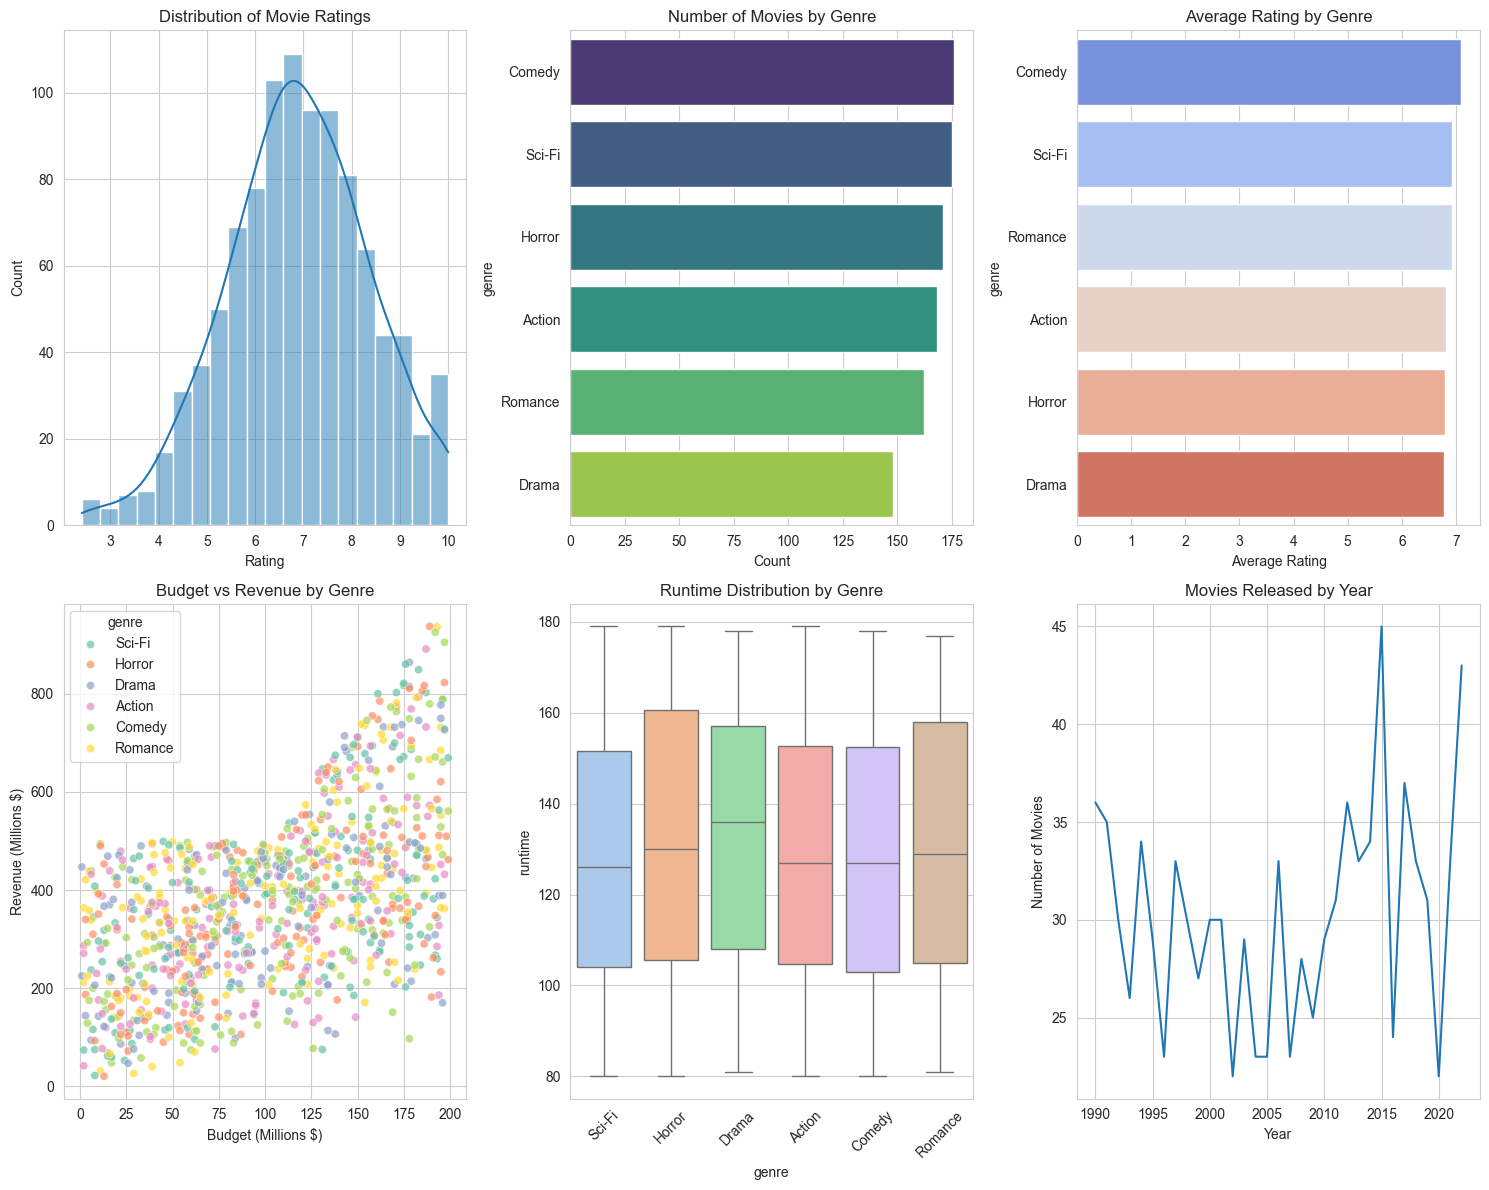

In [4]:
# Set the style for all plots
sns.set_style("whitegrid")
plt.figure(figsize=(15, 12))

# 1. Distribution of Movie Ratings
plt.subplot(2, 3, 1)
sns.histplot(data=df, x='rating', bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')

# 2. Movies by Genre
plt.subplot(2, 3, 2)
genre_counts = df['genre'].value_counts()
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Number of Movies by Genre')
plt.xlabel('Count')

# 3. Average Rating by Genre
plt.subplot(2, 3, 3)
genre_ratings = df.groupby('genre')['rating'].mean().sort_values(ascending=False)
sns.barplot(x=genre_ratings.values, y=genre_ratings.index, palette='coolwarm')
plt.title('Average Rating by Genre')
plt.xlabel('Average Rating')

# 4. Budget vs Revenue Scatter Plot
plt.subplot(2, 3, 4)
sns.scatterplot(data=df, x='budget_millions', y='revenue_millions', 
                hue='genre', alpha=0.7, palette='Set2')
plt.title('Budget vs Revenue by Genre')
plt.xlabel('Budget (Millions $)')
plt.ylabel('Revenue (Millions $)')

# 5. Runtime Distribution by Genre
plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='genre', y='runtime', palette='pastel')
plt.title('Runtime Distribution by Genre')
plt.xticks(rotation=45)

# 6. Movies Released by Year
plt.subplot(2, 3, 6)
movies_per_year = df['year'].value_counts().sort_index()
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values)
plt.title('Movies Released by Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

plt.tight_layout()
plt.show()

##### Advanced visualization

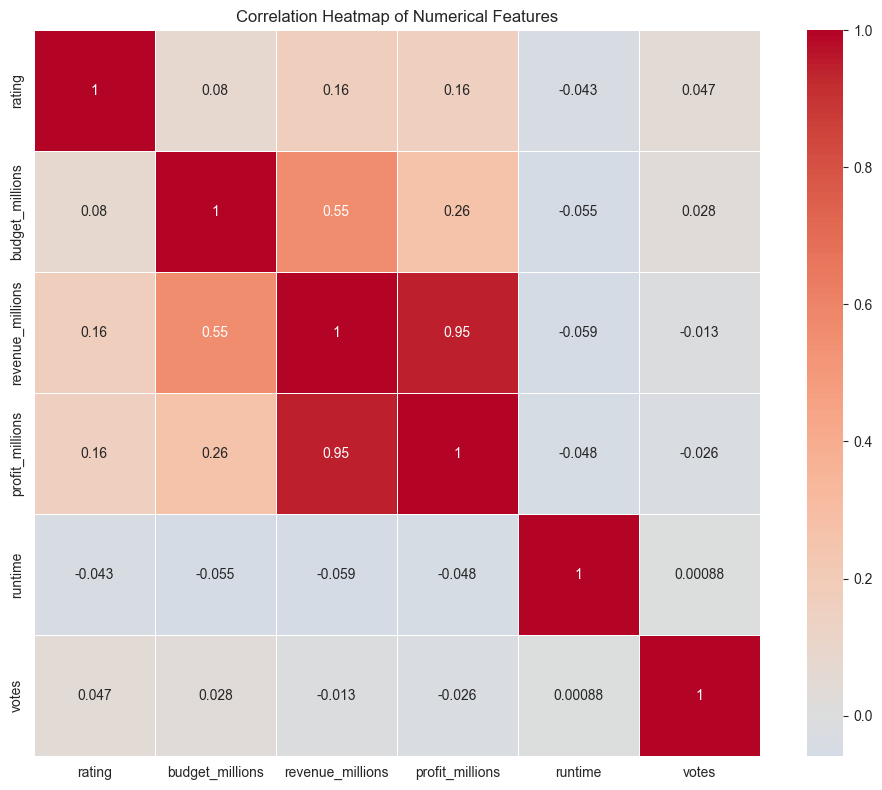

C:\Users\HP\AppData\Local\Temp\ipykernel_3352\817097116.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=company_performance.reset_index(),
C:\Users\HP\AppData\Local\Temp\ipykernel_3352\817097116.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=company_performance.reset_index(),
C:\Users\HP\AppData\Local\Temp\ipykernel_3352\817097116.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=company_performance.reset_index(),


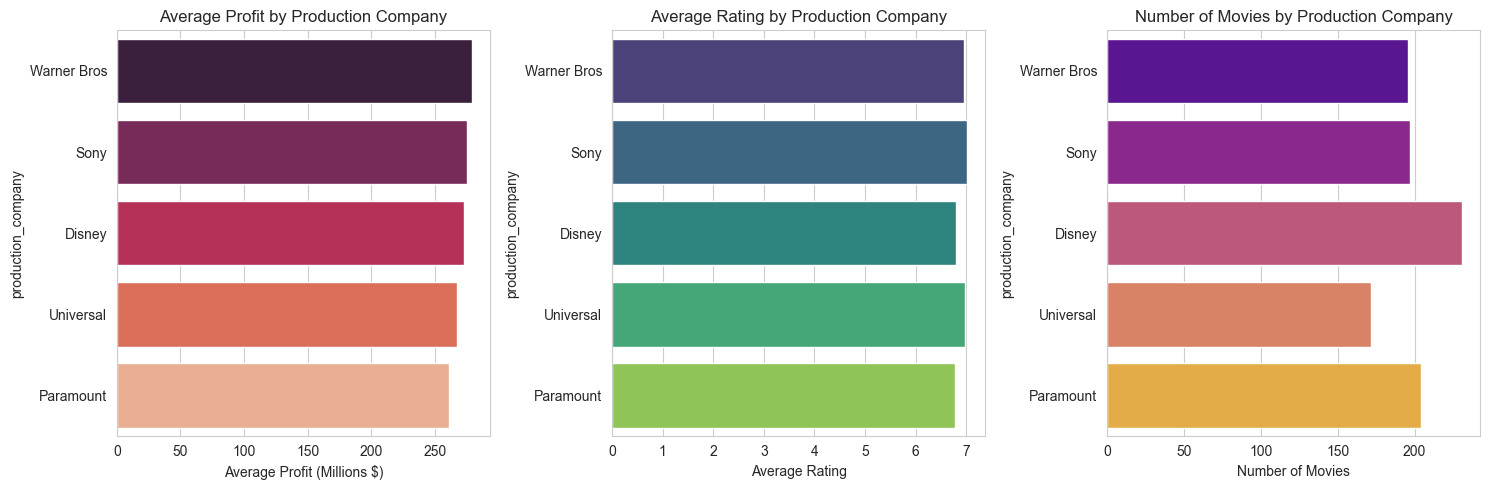

In [5]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
numeric_cols = ['rating', 'budget_millions', 'revenue_millions', 'profit_millions', 'runtime', 'votes']
correlation_matrix = df[numeric_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

# Production Company Analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
company_performance = df.groupby('production_company').agg({
    'rating': 'mean',
    'profit_millions': 'mean',
    'title': 'count'
}).sort_values('profit_millions', ascending=False)

sns.barplot(data=company_performance.reset_index(), 
            x='profit_millions', y='production_company', palette='rocket')
plt.title('Average Profit by Production Company')
plt.xlabel('Average Profit (Millions $)')

plt.subplot(1, 3, 2)
sns.barplot(data=company_performance.reset_index(), 
            x='rating', y='production_company', palette='viridis')
plt.title('Average Rating by Production Company')
plt.xlabel('Average Rating')

plt.subplot(1, 3, 3)
sns.barplot(data=company_performance.reset_index(), 
            x='title', y='production_company', palette='plasma')
plt.title('Number of Movies by Production Company')
plt.xlabel('Number of Movies')

plt.tight_layout()
plt.show()

In [6]:
# Statistical summary by genre
genre_summary = df.groupby('genre').agg({
    'rating': ['mean', 'std', 'count'],
    'budget_millions': 'mean',
    'revenue_millions': 'mean',
    'profit_millions': 'mean',
    'roi': 'mean'
}).round(2)

print("Statistical Summary by Genre:")
print(genre_summary)

# Top performing movies
print("\nTop 10 Highest Rated Movies:")
top_rated = df.nlargest(10, 'rating')[['title', 'year', 'genre', 'rating', 'profit_millions']]
print(top_rated)

print("\nTop 10 Most Profitable Movies:")
most_profitable = df.nlargest(10, 'profit_millions')[['title', 'year', 'genre', 'rating', 'profit_millions', 'roi']]
print(most_profitable)

print("\nBest ROI Movies (Top 10):")
best_roi = df[df['budget_millions'] > 10].nlargest(10, 'roi')[['title', 'year', 'genre', 'rating', 'profit_millions', 'roi']]
print(best_roi)

Statistical Summary by Genre:
        rating             budget_millions revenue_millions profit_millions  \
          mean   std count            mean             mean            mean   
genre                                                                         
Action    6.82  1.35   168           99.23           365.83          266.60   
Comedy    7.09  1.41   176          105.38           369.93          264.55   
Drama     6.79  1.44   148           98.66           365.59          266.93   
Horror    6.80  1.62   171          102.54           373.01          270.47   
Romance   6.92  1.49   162           99.87           383.28          283.41   
Sci-Fi    6.94  1.52   175          103.38           379.58          276.20   

            roi  
           mean  
genre            
Action   616.40  
Comedy   448.69  
Drama    901.94  
Horror   522.02  
Romance  797.78  
Sci-Fi   525.70  

Top 10 Highest Rated Movies:
         title  year   genre  rating  profit_millions
5      Movie

# NUMPY - RANDOM NUMBERS

###### Normal random 

In [12]:
import random 

rand=random.random()
print(rand)
rantints=random.randint(10,56)
print(rantints)

0.2630985485147337
32
